Вспомогательные функции:

In [2]:
import numpy as np                # импорт бибилиотеки numpy
import matplotlib.pyplot as plt   # импорт модуля matplotlib.pyplot
import scipy.io.wavfile # импорт модуля scipy.io.wavfile

def quantize_uniform(x, quant_min=-1, quant_max=1, quant_level=5):
    """Uniform quantization approach
    From: Müller M. Fundamentals of music processing: Audio, analysis, algorithms, applications. – Springer, 2015.
    Notebook: C2S2_DigitalSignalQuantization.ipynb
    Args:
        x: Original signal
        quant_min: Minimum quantization level
        quant_max: Maximum quantization level
        quant_level: Number of quantization levels
    Returns:
        x_quant: Quantized signal
    """
    x_normalize = (x-quant_min) * (quant_level-1) / (quant_max-quant_min)
    x_normalize[x_normalize > quant_level - 1] = quant_level - 1
    x_normalize[x_normalize < 0] = 0
    x_normalize_quant = np.around(x_normalize)
    x_quant = (x_normalize_quant) * (quant_max-quant_min) / (quant_level-1) + quant_min
    return x_quant

import scipy.integrate as integrate # импорт модуля численного интегрирования
def integrate_function(t, func, f, tau, real_part=True):
    # Подынтегральное выражение для использованиия в функции integrate.quad
    # t - время
    # func - функция, задающая импульс
    # f - частота
    # tau - константа, используемая для задания длительности импульса
    if real_part:
        return func(t, tau)*np.cos(-2*np.pi*f*t)  # действительная часть интеграла
    else:
        return func(t, tau)*np.sin(-2*np.pi*f*t)  # мнимая часть интеграла

def fourier_transform(signal, f_band, tau, t1, t2, res_type='abs'):
    # вычисление преобразования Фурье для набора частот
    # signal - функция от t и tau, задающая сигнал во временной области 
    # f_band - набор частот, для которых вычисляется преобразование Фурье
    # tau - константа, используемая для задания длительности импульса
    # t1 момент начала сигнала
    # t2 момент завершения сигнала
    # тип возвращаемого значения:
    # res_type='abs' - |X(f)|
    # res_type='Re' - Re X(f)
    # res_type='Im' - Im X(f)
    if res_type=="abs":
        Re=np.array([integrate.quad(integrate_function, t1, t2, args=(signal, f, tau, True))[0] for f in f_band])
        Im=np.array([integrate.quad(integrate_function, t1, t2, args=(signal, f, tau, False))[0] for f in f_band])
        return abs(Re+1j*Im)
    elif res_type=="Re":
        Re=np.array([integrate.quad(integrate_function, t1, t2, args=(signal, f, tau, True))[0] for f in f_band])
        return Re
    elif res_type=="Im":
        Im=np.array([integrate.quad(integrate_function, t1, t2, args=(signal, f, tau, False))[0] for f in f_band])
        return Im

# Занятие 1 ✅

## Задача 1.1 Дискретизация и квантование.

11 вариант, $$ N = 20, f_0 = 800 Hz, f_s = 4000 Hz $$

Промоделировать дискретизацию и квантование синусоидального сигнала $x(t)=\sin(2\pi f_0 t)$ с частотой дискретизации $f_s$. Пронаблюдать эффекты во временной области для отрезка сигнала из $N$ отсчетов. 

1) Как соотносится растояние между отсчетами по оси времени с частотой дискретизации?\
Ответ: $\Delta t = \frac{1}{f_s}$
2) Как изменяется максимально возможная абсолютная ошибка квантования $\varepsilon[k]=|x[k]-y[k]|$ с ростом числа уровней квантования?\
Ответ: уменьшается

$$ x[k] = \sin(2 \pi f_0 * k \Delta t), \Delta t = \frac{1}{f_s}$$

In [3]:
N  = 20                                   # Число отсчетов по времени
f0 = 800.0                                # Частота синусоиды в Гц
fs = 4000.0                               # Частота дискретизации в Гц
k = np.arange(N)                          # Mассив времен k от 0 до N-1 с шагом 1
x = np.sin(2*np.pi*(f0/fs)*k)             # Последовательность x[k]
num_levels = 8                            # число уровней квантования

Высокое значение fs (например, 44100Hz) при высоком N (например, 100) даст хорошую форму синcуоиды.

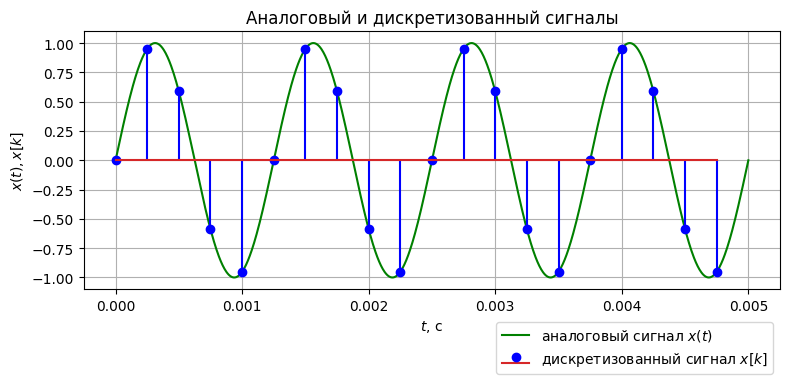

In [4]:
# Построение графиков аналогового и дискретизованного сигнала
plt.figure(figsize=[8, 4])              # создание полотна размером шириной 8 X 4 дюйма
t=np.linspace(0, N/fs, num=1024)        # создание массива времен t (1024 значения от 0 до N*fs)

plt.plot(t, np.sin(2*np.pi*f0*t), 'g', label='аналоговый сигнал $x(t)$')  
                                        # построение графика x(t) (точки соединяются линиями)
                                        # 'g' означает, что используется зеленая линия (green)
plt.stem(k/fs, x, linefmt='b', markerfmt='bo', label='дискретизованный сигнал $x[k]$')            
                                        # построение графика функции дискретного времени x[k]
                                        # 'b', 'bo' означает, что отсчеты оборажаются синим цветом (blue)

plt.grid()                              # сетка
plt.xlabel("$t$, c")                    # подпись оси X
plt.ylabel("$x(t), x[k]$")              # подпись оси Y
plt.title("Аналоговый и дискретизованный сигналы") # заголовок графика
plt.legend(loc='best', bbox_to_anchor=(1, -0.1))
plt.tight_layout()                      # автоматическая корректировка расположения осей графика

In [5]:
# моделирование квантования дискретного сигнала
y = quantize_uniform(x, quant_min=-1, quant_max=1, quant_level=num_levels)
bins = np.linspace(-1, 1, num_levels)

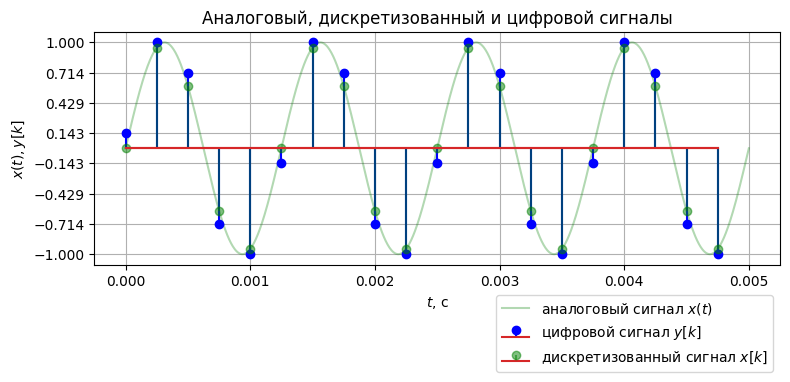

In [6]:
# Вывод графика аналогового и цифрового сигнала
plt.figure(figsize=[8, 4])                  # создание полотна размером шириной 8 X 4 дюйма
t=np.linspace(0, N/fs, num=1024)            # создание массива времен t (1024 значения от 0 до N*fs)
plt.plot(t, np.sin(2*np.pi*f0*t), 'g', label='аналоговый сигнал $x(t)$', alpha=0.3)        
                                            # построение графика x(t) (точки соединяются линиями)

plt.stem(k/fs, y, linefmt='b', markerfmt='bo', label='цифровой сигнал $y[k]$')                
                                            # построение графика функции дискретного времени y[k]
                                            # k/fs - м

markerline, stemlines, baseline = plt.stem(k/fs, x, linefmt='g', markerfmt='go', label='дискретизованный сигнал $x[k]$')                                               
markerline.set_alpha(0.5)
stemlines.set_alpha(0.5)

if num_levels<21:                           # если число уровней не велико, то производится
    plt.yticks(bins)                        # установка делений шкалы оси Y, совпадающих с уровнями квантования

plt.grid()                                  # сетка
plt.xlabel("$t$, c")                        # подпись оси X
plt.ylabel("$x(t), y[k]$")                  # подпись оси Y
plt.title("Аналоговый, дискретизованный и цифровой сигналы")  # заголовок графика
plt.legend(loc='best', bbox_to_anchor=(1, -0.1))
plt.tight_layout()                          # автоматическая корректировка расположения осей графика

In [7]:
abs(x-y)

array([0.14285714, 0.04894348, 0.12650046, 0.12650046, 0.04894348,
       0.14285714, 0.04894348, 0.12650046, 0.12650046, 0.04894348,
       0.14285714, 0.04894348, 0.12650046, 0.12650046, 0.04894348,
       0.14285714, 0.04894348, 0.12650046, 0.12650046, 0.04894348])

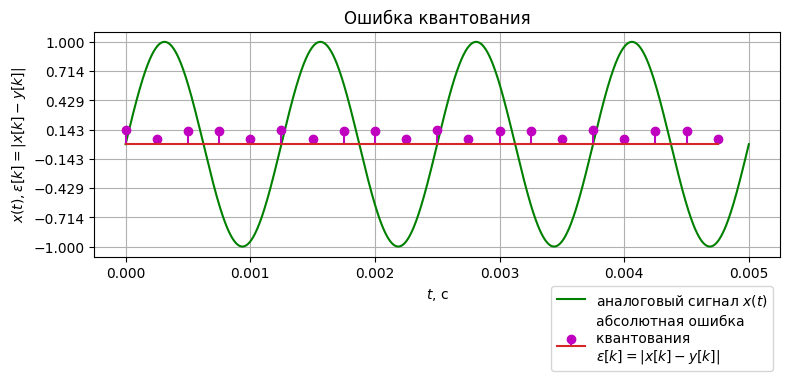

In [8]:
plt.figure(figsize=[8, 4])
plt.title("Ошибка квантования") 
plt.plot(t, np.sin(2*np.pi*f0*t), 'g', label='аналоговый сигнал $x(t)$')
plt.stem(k/fs, abs(x-y), linefmt='m', markerfmt='mo', label="абсолютная ошибка \nквантования \n$\\epsilon[k]=|x[k]-y[k]|$")       
                                      #вывод абсолютных значений ошибки квантования для дискретного сигнала
plt.yticks(bins)
plt.grid()
plt.xlabel("$t$, c")                                          # подпись оси X
plt.ylabel("$x(t), \\varepsilon[k]=|x[k]-y[k]|$")             # подпись оси Y
plt.legend(loc='best', bbox_to_anchor=(1, -0.1))
plt.tight_layout() 
plt.show()

## Задача 1.2. Декодирование .wav файла

Вариант 11, ` tuning_fork.wav `

1) Определите частоту дискретизации, битную глубину записи (соотвествует dtype) и соотвествующее ей колличество уровней квантования. \
Ответ: $ f_s = 44100 Hz, глубина\ записи\ в\ битах = 16, соответсвующее\ число\ уровней\ квантования = 2^{16} = 65536$
2) Сравните растояние между отсчетами по оси времени на графике с частотой дискретизации.\
Ответ: $\Delta t = \frac{1}{f_s} \approx 22.7 мкс$
3) Поменяйте ось времени (первый аргумент функции `plt.plot`) так, чтобы первому отсчету наблюдаемого диапазона соотвествовало время от начала файла.\
Ответ: добавил переменную START
4) Определите длину записи в секундах.\
Ответ: 3.08 сек
5) Оцените объем файла в килобайтах (КБ), при условии, что никакое дополнительное сжатие не производится (использовать данные о частоте дискретизации, числе отсчетов и битовой глубине). Сравние с реальным объемом файла.\
Ответ: на один отсчёт 16 бит, отсчётов 135680 => размер файла 16 бит * 135680 = 2170880 бит = 265 кБ\
Рельный размер файла: 266 кБ

In [9]:
fs, x = scipy.io.wavfile.read('dataset_lab1/tuning-fork.wav') # чтение аудиофайла 

print("Однокональный файл") if x.ndim == 1 else print(f"Многоканальный файл: {x.ndim} каналов.")
print(f'Тип данных: {x.dtype}')
print(f'Число уровней квантования: {np.pow(2, 16)}')
print(f'Частота дискретизации: {fs}')
print(f'Сигнал: {x}, число отсчётов: {x.size}')

Однокональный файл
Тип данных: int16
Число уровней квантования: 65536
Частота дискретизации: 44100
Сигнал: [ 0  0 -1 ... -3  2 -1], число отсчётов: 135680


In [10]:
print(f'Длительность записи: {x.size / fs:.2f} сек')

Длительность записи: 3.08 сек


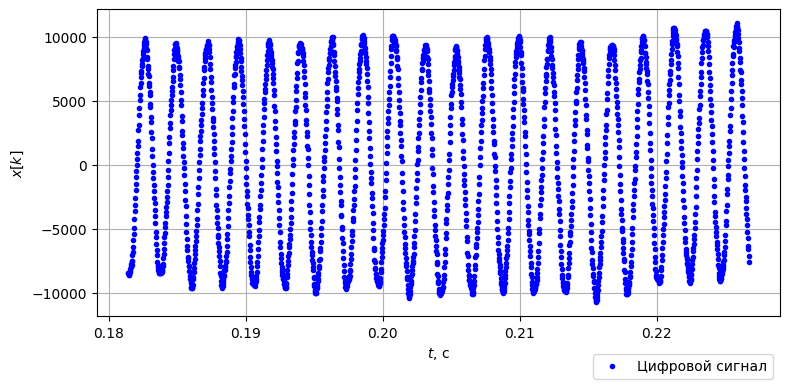

In [11]:
START, END = 8_000, 10_000
x1=x[START:END]                     # выбор наблюдаемого диапазона
k=np.arange(x1.size) + START      # отсчеты по времени

# Построение графиков 
plt.figure(figsize=[8, 4])         # создание полотна размером шириной 8 X 4 дюйма
plt.plot(k/fs, x1, 'b.', label='Цифровой сигнал')           # построение графика цифрового сигнала точками
plt.grid()                             
plt.xlabel("$t$, c")                      
plt.ylabel("$x[k]$")             
plt.legend(loc='best', bbox_to_anchor=(1, -0.1))
plt.tight_layout()

# Занятие 2. Спектры импульсных и периодических сигналов. ✅

## Задача 2.1. Спектры симметричных оконных функций

$\tau = 3500 мкс$

Для заданного параметра $\tau$ из таблицы, построить графики модуля спектральной плотности $|X(f)|$ для прямоугольного окна, 
$$w_b(t)=\left\{ \begin{matrix}
   1, & \text{ }\text{если }|t|\le \tau /2,  \\
   0, & \text{ }\text{если }|t|>\tau /2; \\
\end{matrix} \right.$$
треугольного окна
$$w_t(t)=\left\{ \begin{matrix}
   1-\dfrac{|t|}{\tau /2}, & \text{ }\text{если }|t|\le \tau /2,  \\
   0, & \text{ }\text{если }|t|>\tau /2.  \\
\end{matrix} \right.$$
 и окна Ханна
$$w_H(t)=\left\{ \begin{matrix}
   \dfrac{1}{2}\left( 1+\cos \left( 2\pi \dfrac{t}{\tau } \right) \right), & \text{ }\text{если }|t|\le \tau /2,  \\
   0, & \text{ }\text{если }|t|>\tau /2.  \\
\end{matrix} \right.$$



Привести аналитические формулы спектральной плотности для этих импульсов. 


- Для $w_b(t)$
$$
X(f) = \int_{-\infty}^{+\infty}w_b(t)e^{-j2\pi ft}dt = \int_{-\tau/2}^{+\tau/2}w_b(t)e^{-j2\pi ft}dt = | \xi \triangleq 2\pi jft| = \\ = \frac{1}{2\pi jf}(-e^{-\xi}) \Big|_{-2\pi jf\tau/2}^{+2\pi jf\tau/2} = \frac{1}{2\pi jf}(e^{2\pi jf\tau/2} - e^{-2\pi jf\tau/2}) =
\tau \frac{\sin(2\pi f\tau/2)}{\pi f\tau} = \tau sinc(\pi f \tau)
$$
То есть
$$
|X(f)_b| = \tau \Big| \frac{sin(\pi f \tau)}{\pi f \tau} \Big|
$$
- Для $w_t(t)$ \
Производная имеет вид импульса манчестера, к которому можно дважды приментить теорему запаздывания.\
Имеем
$$
|X(f)_t| = \Big| \frac{\tau}{2} \frac{\sin^2(\pi f \tau / 2)}{(\pi f \tau / 2)^2} \Big|
$$
- Для $w_H(t)$\
Распишем сигнал как сумму трёх прямоугольных окон и воспользуемся теоремой смещения, получим
$$
|X(f)_H| = \Big| \frac{\sin(\pi f \tau)}{2\pi f(1 - \tau^2 f^2)} \Big|
$$


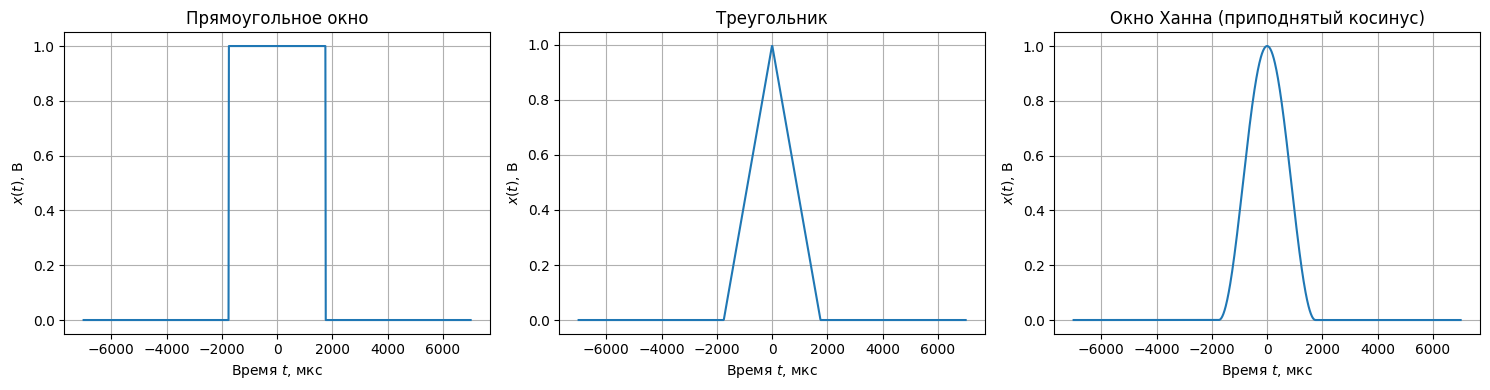

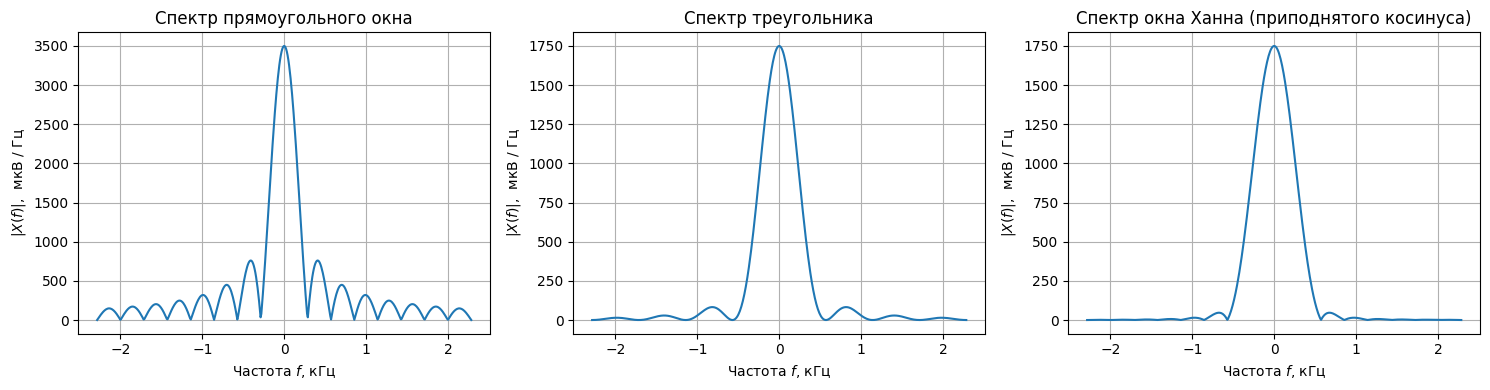

In [12]:
import matplotlib.pyplot as plt
import numpy as np
#%matplotlib widget

tau=3500e-6 #3500 мкс

f_band=np.linspace(-8/tau, 8/tau, 500) # 500 - число точек в диапазоне, в которых вычисляется X(f)

def boxcar(t, tau):
    if abs(t)<tau/2:
        return 1.0                 
    else:
        return 0.0           

def triangle(t, tau):
    if abs(t) < tau/2:
        return 1 - abs(t)/(tau/2)
    else:
        return 0

def hann(t, tau):
    if abs(t) < tau/2:
        return (1 + np.cos(2*np.pi * t / tau)) / 2
    else:
        return 0
     
t_band=np.linspace(-2*tau, 2*tau, 1024)

fig, ax = plt.subplots(1, 3, figsize=[15, 4])
ax[0].plot(t_band*1e6, [boxcar(t, tau) for t in t_band])
ax[1].plot(t_band*1e6, [triangle(t, tau) for t in t_band])
ax[2].plot(t_band*1e6, [hann(t, tau) for t in t_band])
[ ax.set_xlabel("Время $t$, мкс") for ax in ax ]
[ ax.set_ylabel("$x(t)$, В") for ax in ax ]
ax[0].set_title("Прямоугольное окно")
ax[1].set_title("Треугольник")
ax[2].set_title("Окно Ханна (приподнятый косинус)")
[ ax.grid() for ax in ax ]
plt.tight_layout() 

fig, ax = plt.subplots(1, 3, figsize=[15, 4])
ax[0].plot(f_band/1e3, fourier_transform(signal=boxcar, f_band=f_band, tau=tau, t1=-tau/2, t2=tau/2, res_type="abs")*1e6)
ax[1].plot(f_band/1e3, fourier_transform(signal=triangle, f_band=f_band, tau=tau, t1=-tau/2, t2=tau/2, res_type="abs")*1e6)
ax[2].plot(f_band/1e3, fourier_transform(signal=hann, f_band=f_band, tau=tau, t1=-tau/2, t2=tau/2, res_type="abs")*1e6)
[ ax.set_xlabel("Частота $f$, кГц") for ax in ax ]
[ ax.set_ylabel("$|X(f)|$,  мкВ / Гц") for ax in ax ]
ax[0].set_title("Спектр прямоугольного окна")
ax[1].set_title("Спектр треугольника")
ax[2].set_title("Спектр окна Ханна (приподнятого косинуса)")
[ ax.grid() for ax in ax ]
plt.tight_layout() 

Определить 
* а) уровни первого бокового лепестка относительно главного в $|X(f)|$ (практич.) в дБ ($20\lg  \left|\dfrac{X(f)}{X(0)}\right| $ ),
* б) расположение нулей $|X(f)|$ (практич. и теоретическое).

Заполнить таблицу для трех окон.

Для прямоугольного уровень первого бокового лепестка $ X(f) = 760 $, уровень главного лепестка $ X(0) = 3500 $\
Для треугольного уровень первого бокового лепестка $ X(f) = 83 $, уровень главного лепестка $ X(0) = 1750 $\
Для Ханна уровень первого бокового лепестка $ X(f) = 760 $, уровень главного лепестка $ X(0) = 1750 $

Ширины лепестков определяем по первым нулям.

In [13]:
def to_db(X_f, X_0):
    return 20*np.log10(abs(X_f / X_0))

print(to_db(760, 3500), to_db(83, 1750), to_db(47, 1750))

-13.265089041389686 -26.47919912620441 -31.418803815011536


| Окна  |   Уровень первого бокового лепестка относительно главного, дБ  |  Ширина главного лепестка, Гц  |
|:-----------:|:---:|:---:|
| прямоугольное | -13.3 |  280*2 = 560   |
| треугольное |  -26.5  |  570*2 = 1140    |
| Ханна |  -31.4 |   570*2 = 1140   |


По теории ширина главного лепестка (вычислены положения первых нулей, которые надо умножить на $2$):
- для прямоуг. окна: $\pi f_0 \tau = \pi \rightarrow f_0 = \frac{1}{\tau} \approx 286 Hz$
- для треуг. окна: $ \pi f_0 \tau /2 = \pi \rightarrow f_0 = \frac{2}{\tau} \approx 571 Hz $
- для окна Ханна: $ \pi f_0 \tau /2 = \pi \rightarrow f_0 = \frac{2}{\tau} \approx 571 Hz $ (не $1/\tau$, т.к. тогда 0 ноль в знаменателе)

In [14]:
print(1/tau)
print(2/tau)

285.7142857142857
571.4285714285714


## Задача 2.2. Теорема запаздывания для преобразования Фурье

$ E = 7В, \tau = 3500 мкс$

Для заданных параметров $E$ и $\tau$ из таблицы, построить и сравнить графики $\text{Re} X(f)$, $\text{Im} X(f)$, $|X(f)|$ для прямоугольного импульса, начинающегося в моменты времени $-\tau /2$ и $0$. Как согласуются результаты с теоремой запаздывания для преобразования Фурье?


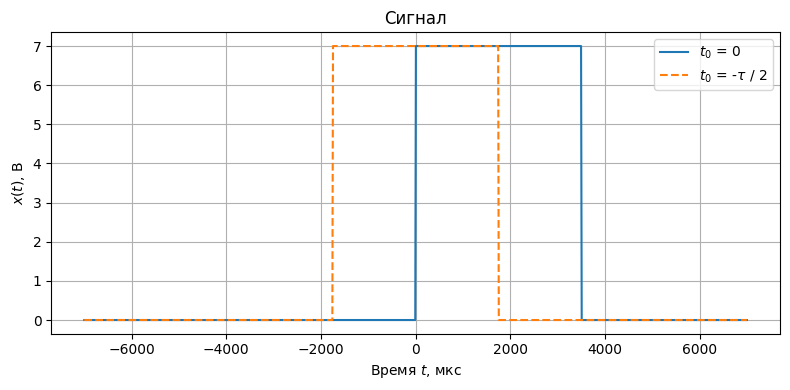

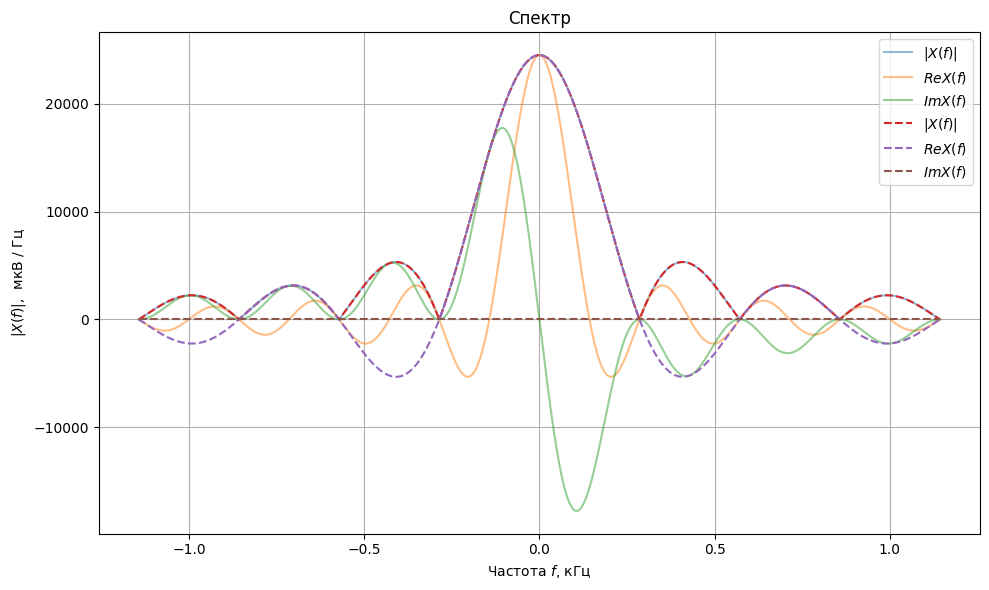

In [15]:
tau=3500*1e-6 #3500 мкс

f_band=np.linspace(-4/tau, 4/tau, 1000) # 1000 - число точек в диапазоне, в которых вычисляется X(f)

def boxcar(t, tau):
    if 0<t<tau:
        return 7.0 # 7 В
    else:
        return 0.0 # 0 В
    
def boxcar_centered(t, tau):
    if -tau/2 < t < tau/2:
        return 7.0
    else:
        return 0.0
    
t_band=np.linspace(-2*tau, 2*tau, 1024)
plt.figure(figsize=[8, 4])
plt.plot(t_band*1e6, [boxcar(t, tau) for t in t_band], label=r'$t_0$ = 0')
plt.plot(t_band*1e6, [boxcar_centered(t, tau) for t in t_band], linestyle='--', label=r'$t_0$ = -$\tau$ / 2')
plt.xlabel("Время $t$, мкс")
plt.ylabel("$x(t)$, В")
plt.title("Сигнал")
plt.legend()
plt.tight_layout() 
plt.grid()

plt.figure(figsize=[10, 6])
plt.plot(f_band/1e3, fourier_transform(signal=boxcar, f_band=f_band, tau=tau, t1=-2*tau, t2=2*tau, res_type="abs")*1e6, label='$|X(f)|$', alpha=0.5)
plt.plot(f_band/1e3, fourier_transform(signal=boxcar, f_band=f_band, tau=tau, t1=-2*tau, t2=2*tau, res_type="Re")*1e6, label='${Re }X(f)$', alpha=0.5)
plt.plot(f_band/1e3, fourier_transform(signal=boxcar, f_band=f_band, tau=tau, t1=-2*tau, t2=2*tau, res_type="Im")*1e6, label='${Im }X(f)$', alpha=0.5)

plt.plot(f_band/1e3, fourier_transform(signal=boxcar_centered, f_band=f_band, tau=tau, t1=-2*tau, t2=2*tau, res_type="abs")*1e6, label='$|X(f)|$', linestyle='--')
plt.plot(f_band/1e3, fourier_transform(signal=boxcar_centered, f_band=f_band, tau=tau, t1=-2*tau, t2=2*tau, res_type="Re")*1e6, label='${Re }X(f)$',  linestyle='--')
plt.plot(f_band/1e3, fourier_transform(signal=boxcar_centered, f_band=f_band, tau=tau, t1=-2*tau, t2=2*tau, res_type="Im")*1e6, label='${Im }X(f)$',  linestyle='--')

plt.xlabel("Частота $f$, кГц")
plt.ylabel("$|X(f)|$,  мкВ / Гц")
plt.title("Спектр")
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.tight_layout() 
plt.grid()

Спектр прямоугольника с началом в $-\tau/2$ есть 
$$
X(f)_{box} = \tau \frac{sin(\pi f \tau)}{\pi f \tau},
$$
тогда по теореме запаздывания спектр прямоугольника с началом в $0$ это
$$
X(f)_{box}^{shifted} = \tau \frac{sin(\pi f \tau)}{\pi f \tau} e^{-j\pi f \tau/2}.
$$
Видим, что к действительной части спектра сдвинутого прямоугольника "примешивается" косинус, а к мнимой - синус. Модуль же спектра никак не меняется.

## Задача 2.3. Спектр отрезка синусоиды

$ f_0 = 35 kHz, \tau = 171 мкс$

Для заданных параметров  $f_0$  и  $\tau$  построить $|X(f)|$ для отрезка синусоиды $x(t)=\sin(2\pi f_0 t)$ c частотой $f_0$ длительностью  $\tau$. 

1) Сравнить положение главных спектральных максимумов с частотой синусоиды. \
Главные максимумы на частотах 34.85 kHz и -34.85 kHz. Примерно совпадает.
2) Повторить вычисления для отрезка синусоиды, взвешанного окном Ханна соотвествующей длины. Сравнить ширину главного лепестка на нулевом уровне и значение  $|X(f)|$ на частоте $f_0$ для сигнала $x(t)$, взвешанного прямоугольным окном и окном Ханна.\
Главные максимумы на частотах 35 kHz и -35 kHz. Совпадает точно.

| Окна  |   Значение $\|X(f)\|$ на частоте $f_0$  |  Ширина главного лепестка, кГц  |
|:-----------:|:---:|:---:|
| прямоугольное | 85.8 |  11.7   |
| Ханна |  42.85 |   23.4   |


3) Сравнить спектр периодического сигнала  $x(t)=\sin(2\pi f_0 t)$ с получившимися графиками.\
Спектр периодического сигнала $x(t)=\sin(2\pi f_0 t) = \frac{1}{2j}(e^{j2\pi f_0 t} - e^{-j2\pi f_0 t}) $ это  $X(f) = \frac{1}{2j}\delta(f-f_0) - \frac{1}{2j}\delta(f+f_0)$.\
Т.е. для период. сигнала должны наблюдать две дельта-функции с весами $ 1/2 j $ и $ -1/2 j $. \
Ясно виден **эффект растекания спектральных компонент** при "вырезании" части сигнала окном.

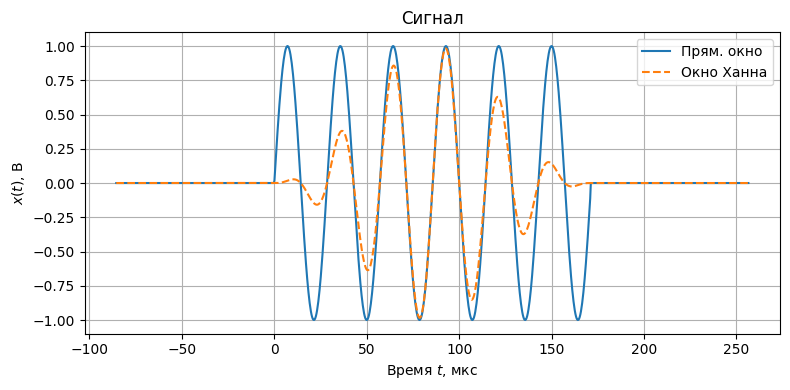

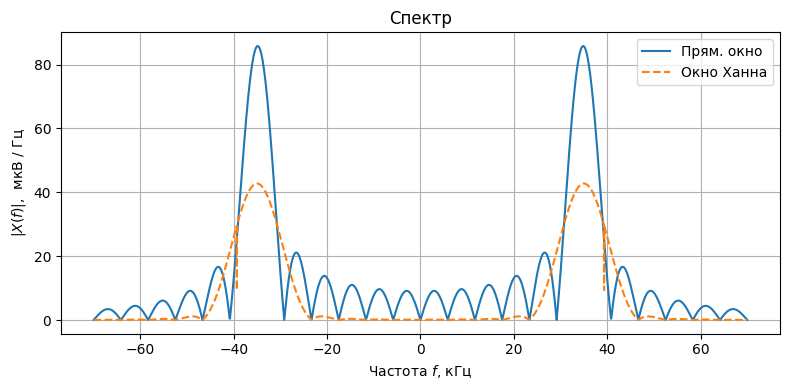

In [32]:
f0=35*1e3       # 35 кГц
tau=171*1e-6    # 171 мкс

def sin_with_boxcar(t, tau):                        
    if 0<=t<=tau:
        # случай прямоугольного окна
        return np.sin(2*np.pi*f0*t)
    else:
        return 0.0
    
def sin_with_hann(t, tau):                        
    if 0<=t<=tau:
        # случай окна Ханна
        return np.sin(2*np.pi*f0*t) * (0.5+0.5*np.cos(np.pi*(t-tau/2)/(tau/2)))
    else:
        return 0.0
    
f1, f2 = 100e3, 200e3
#tau = 0.1e-3
def cos_double_with_hann(t, tau):
    if -tau/2 <= t <= tau/2:
        return (np.cos(2*np.pi*f1*t) + 2*np.cos(2*np.pi*f2*t)) * (0.5+0.5*np.cos(2*np.pi*(t)/(tau)))
    else:
        return 0.0

def sin_with_nothing(t, tau):                        
  return np.sin(2*np.pi*f0*t)

f_band=np.linspace(-2*f0, 2*f0, 2000) 
# f_band=np.linspace(-2*f2, 2*f2, 2000) 

t_band=np.linspace(-0.5*tau, 1.5*tau, 1024)
plt.figure(figsize=[8, 4])
plt.plot(t_band*1e6, [sin_with_boxcar(t, tau) for t in t_band], label='Прям. окно')
plt.plot(t_band*1e6, [sin_with_hann(t, tau) for t in t_band], linestyle='--', label='Окно Ханна')
plt.title("Сигнал")
plt.xlabel("Время $t$, мкс")
plt.ylabel("$x(t)$, В")
plt.legend()
plt.tight_layout() 
plt.grid()

plt.figure(figsize=[8, 4])
plt.plot(f_band/1e3, fourier_transform(signal=sin_with_boxcar, f_band=f_band, tau=tau, t1=-2*tau, t2=2*tau, res_type="abs")*1e6, label='Прям. окно')
plt.plot(f_band/1e3, fourier_transform(signal=sin_with_hann, f_band=f_band, tau=tau, t1=-2*tau, t2=2*tau, res_type="abs")*1e6, linestyle='--', label='Окно Ханна')
plt.title("Спектр")
plt.xlabel("Частота $f$, кГц")
plt.ylabel("$|X(f)|$,  мкВ / Гц")
plt.legend()
plt.tight_layout() 
plt.grid()

## Задача 2.4. Спектр пачки равноотстоящих импульсов

$N$ = 3, $\tau$ = 450 мкс, $T_{period}$ = 810 мкс

Провести вычисления для заданных значений $N$, $\tau$, $T_{period}$. Сравнить получившийся график с аналитическим выражением для спектра.

/tmp/ipykernel_3751/2973762340.py:48: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  Re=np.array([integrate.quad(integrate_function, t1, t2, args=(signal, f, tau, True))[0] for f in f_band])
/tmp/ipykernel_3751/2973762340.py:48: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  Re=np.array([integrate.quad(integrate_function, t1, t2, args=(signal, f, tau, True))[0] for f in f_band])
/tmp/ipykernel_3751/2973762340.py:49: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is ad

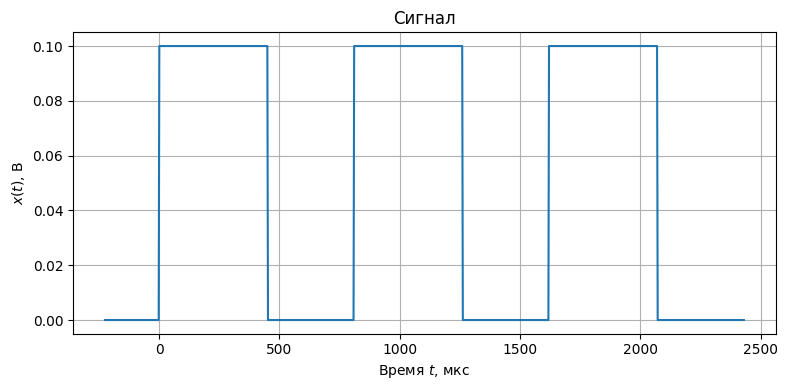

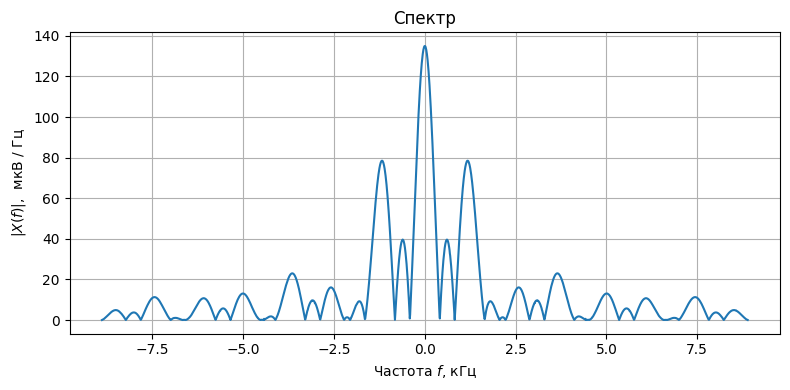

In [17]:
N=3
tau=450e-6 #450 мкс
period = 810e-6 

f_band=np.linspace(-4/tau, 4/tau, 2000) # 2000 - число точек в диапазоне, в которых вычисляется X(f)

def boxcar(t, tau):
    
    for n in range(N):
        tau0 = period * n
        tau1 = tau + period * n
        if tau0 < t < tau1:
            return 0.1 # 0.1 В
    return 0.0 # 0 В
    
t_band=np.linspace(-0.5*tau, N*period, 1024)
plt.figure(figsize=[8, 4])
plt.plot(t_band*1e6, [boxcar(t, tau) for t in t_band])
plt.xlabel("Время $t$, мкс")
plt.ylabel("$x(t)$, В")
plt.title("Сигнал")
plt.tight_layout() 
plt.grid()

plt.figure(figsize=[8, 4])
plt.plot(f_band/1e3, fourier_transform(signal=boxcar, f_band=f_band, tau=tau, t1=0, t2=N*period, res_type="abs")*1e6)
plt.title("Спектр")
plt.xlabel("Частота $f$, кГц")
plt.ylabel("$|X(f)|$,  мкВ / Гц")
plt.tight_layout() 
plt.grid()

In [18]:
print(1/tau)
print(1/period)

2222.222222222222
1234.567901234568


Аналитическое выражение для модуля спектра:
$$
|X(f)| = \tau \Big |\frac{sin(\pi f \tau)}{\pi f \tau}\Big | \Big |\frac{sin(2\pi f \frac{3T}{2})}{2\pi f \frac{T}{2} }\Big |
$$
График согласуется с этим выражением, имеем нули в $1 / \tau$ и боковые лепестки в $1 / T$.

# Занятие 3. Эффект наложения спектров при дискретизации сигналов. ✅

## Задача 3.1. Эффект наложения при дискретизации прямоугольного импульса

$\tau$ = 3500мкс

Рассмотреть прямоугольный импульс длительностью $1.05\tau$. Дискретизовать его с частотой $f_s  = 10/ \tau $.  Построить спектр прямоугольного импульса и полученного дискретизованного сигнала. 

Пронаблюдать наложение спектра при дискретизации. 

Найти сигнал,  который дискретизуется такой же последовательностью, как и прямоугольный импульс, но при этом не наблюдается эффект наложения (сигнал, который восстанавливается с помощью интерполяционного ряда Котельникова).

In [19]:
def DTFT_abs3(xk, fs, M=2048):
    res=abs(np.fft.fftshift(np.fft.fft(xk, M)))
    return fs*np.arange(-1.5, 1.5, 1/M), np.hstack((res, res, res)) 

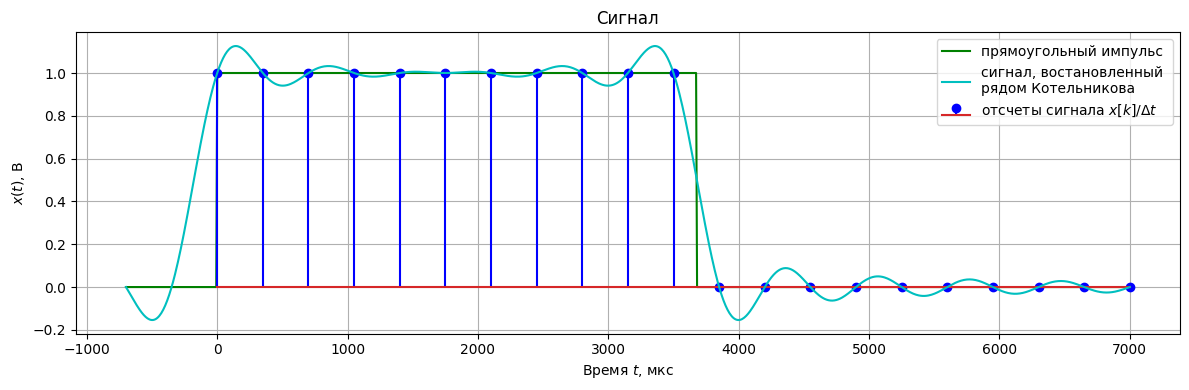

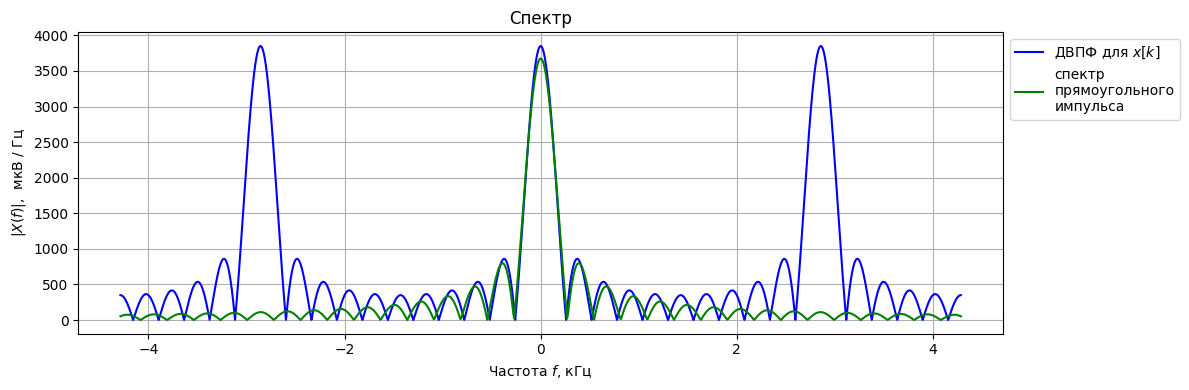

In [20]:
tau=3500*1e-6 #200 мкс
fs=10/tau

f_band=np.linspace(-1.5*fs, 1.5*fs, 1000) # 1000 - число точек в диапазоне, в которых вычисляется X(f)

def boxcar(t, tau):
    if 0 <= t <= 1.05*tau:
        return 1.0 
    elif np.isclose(t, 1.05*tau, atol=1e-12) or np.isclose(t, 0, atol=1e-12):
        return 1.0 
    else:
        return 0.0 

def sinc_phi(t, k, fs):
    dt=1/fs
    if np.isclose(0, t-k*dt):
        return 1.0
    else:
        return np.sin(np.pi*fs*(t-k*dt))/(np.pi*fs*(t-k*dt))
    
def sinc_interp(t, xk):
    return sum([xk[k]*fs*sinc_phi(t, k, fs) for k in range(len(xk))])

tk = np.arange(0, 2*tau+1.0/fs, 1.0/fs, dtype=float)
xk = np.array([(1/fs)*boxcar(tk1, tau) for tk1 in tk])
    
t_band=np.linspace(-0.2*tau, 2*tau, 1024)
plt.figure(figsize=[12, 4])
plt.plot(t_band*1e6, [boxcar(t, tau) for t in t_band], 'g', label='прямоугольный импульс')
plt.stem(tk*1e6, xk*fs, linefmt='b', markerfmt='bo', label='отсчеты сигнала $x[k]/{\\Delta t}$')



plt.plot(t_band*1e6, np.array([sinc_interp(t, xk) for t in t_band]), 'c', label='сигнал, востановленный \nрядом Котельникова')

plt.title("Сигнал")
plt.xlabel("Время $t$, мкс")
plt.ylabel("$x(t)$, В")
plt.grid()
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.tight_layout() 

plt.figure(figsize=[12, 4])


DFTF_plot=DTFT_abs3(xk, fs)
plt.plot(DFTF_plot[0]/1e3, DFTF_plot[1]*1e6, 'b', label='ДВПФ для $x[k]$')

plt.plot(f_band/1e3, fourier_transform(signal=boxcar, f_band=f_band, tau=tau, t1=-2*tau, t2=2*tau, res_type="abs")*1e6, 
         'g', label='спектр\nпрямоугольного\nимпульса')

plt.title("Спектр")
plt.grid()
plt.xlabel("Частота $f$, кГц")
plt.ylabel("$|X(f)|$,  мкВ / Гц")
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.tight_layout() 

Спектр прямоугольного окна
$$
X(f)_{box} = \tau \frac{sin(\pi f \tau)}{\pi f \tau}
$$
Нули в точках 
$$
f_n = \frac{n}{\tau},\ n \in Z / \{0\}
$$

- Континуальная форма дискретизованного сигнала $x_{д}(t)$ (аналоговый сигнал - $x_{а}(t)$)
$$
x_{д}(t) = \sum_{k=-\infty}^{+\infty}x[k]\delta(t - k\Delta t), x[k] \triangleq \mathbf{\Delta t} \ x_{а}(k \Delta t) 
$$
**Важно**, что частота дискретизации $ f_{д} = \frac{1}{\Delta t}$.
- Связь спектра дискретизованного сигнала $X_{д}$ со спектром аналогового сигнала $X_{a}$
$$
X_{д}(f) = \sum_{n=-\infty}^{+\infty}X_{а}(f - nf_{д})
$$, 
- ДВПФ (спектр дискретизованного сигнала по отсчётам) и обратное ДВПФ
$$
X_{д}(f) = \sum_{k=-\infty}^{+\infty}x[k]e^{-j2\pi f k\Delta t}, \\
x[k] = \Delta t \int_{-f_{д}/2}^{+f_{д}/2} X_{д}(f)e^{+j2\pi f k\Delta t}df
$$
- Ряд Котельникова (оценка аналогового сигнала по дискретным отсчётам)
$$
x_{a}(t) = \sum_{k=-\infty}^{+\infty}x_{a}(k\Delta t) \frac{sin(2\pi f_{в}(t - k \Delta t))}{2\pi f_{в}(t - k \Delta t)}
$$
Здесь предполагается, что спектр аналогового сигнала ограничен полосой $[-f_{в}; +f_{в}]$.\
При $f_{д} = \frac{1}{\Delta t} = 2 f_{в}$ спектр $X_{a}(f)$ попадает в полосу Найквиста $[-f_{д}/2; +f_{д}/2]$ и равентсво точное.\
Иначе в качестве $f_{в}$ берём некоторую частоту, вне которой мощность сигнала мала, и $f_{д}$ (а значит и $\Delta t$) снова полагаем равной $2f_{в}$ ($\Delta t = \frac{1}{2f_{в}}$).

In [21]:
print(1/tau, fs, sep='\n')

285.7142857142857
2857.1428571428573


Ряд Котельникова в данном случае имеет вид
$$
x_{a}(t) = \sum_{0}^{10}1\frac{sin(2\pi \frac{f_{д}}{2} (t - k\Delta t))}{2\pi \frac{f_{д}}{2} (t - k\Delta t)} =
\sum_{0}^{10}\frac{sin(2\pi (5/\tau) (t - k\Delta t))}{2\pi (5/\tau) (t - k\Delta t)} = 
\sum_{0}^{10}\frac{sin(10\pi/\tau (t - k\Delta t))}{10\pi/\tau (t - k\Delta t)}
$$

## Задача 3.2. Эффект наложения при прореживании сигнала

$K_{1}$ = 10, $K_{2}$ = 70


Выполнить прореживание (downsampling) сигнала камертона из файла `tuning-fork.wav` (основная частота сигнала 440 Гц, частота дискретизации 44100 Гц) без предварительной фильтрации, оставляя в одном случае каждый $K_1$-ый, а в другом каждый $K_2$-ый отсчет сигнала. В чем принципиальное отличие между спектрами получившихся сигналов и какими эффектами оно обусловлено? 

In [22]:
def DTFT_abs(xk, fs, M=2**17):
    res=abs(np.fft.fftshift(np.fft.fft(xk, M)))
    return fs*np.arange(-0.5, 0.5, 1/M), np.hstack((res)) 

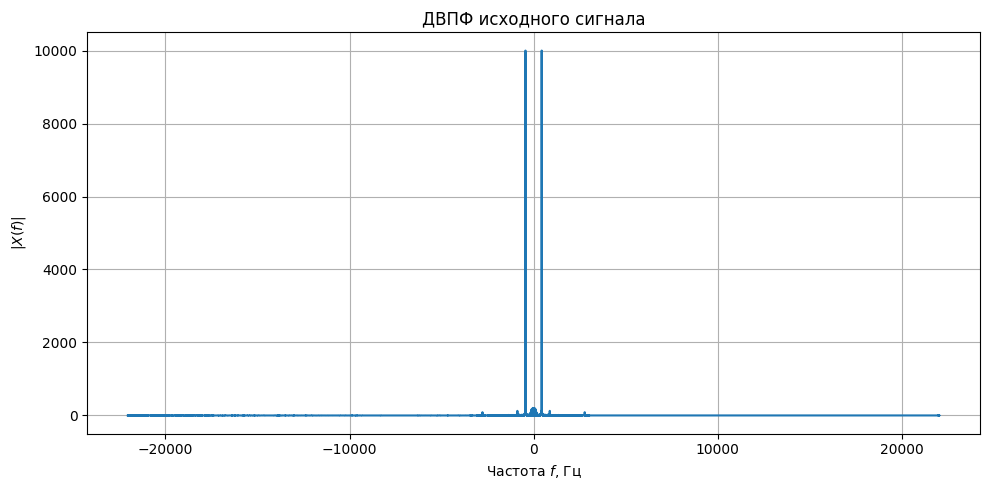

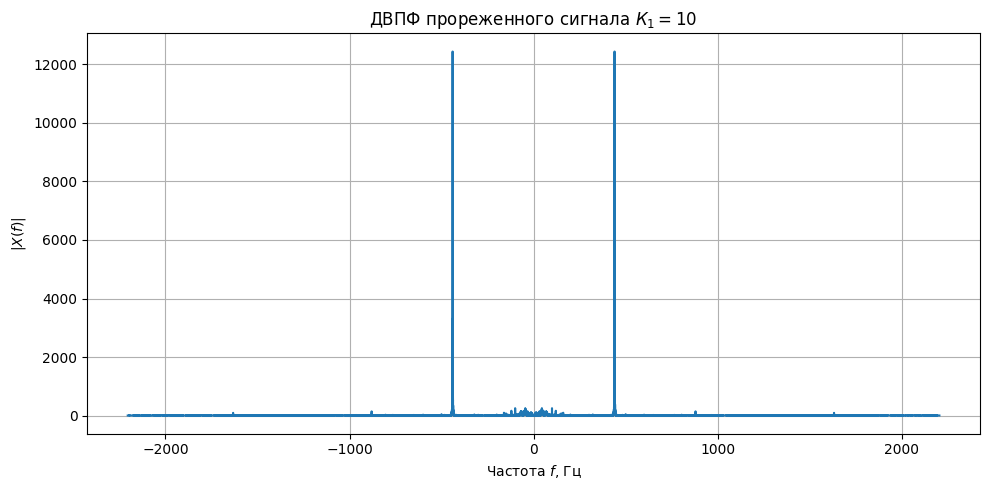

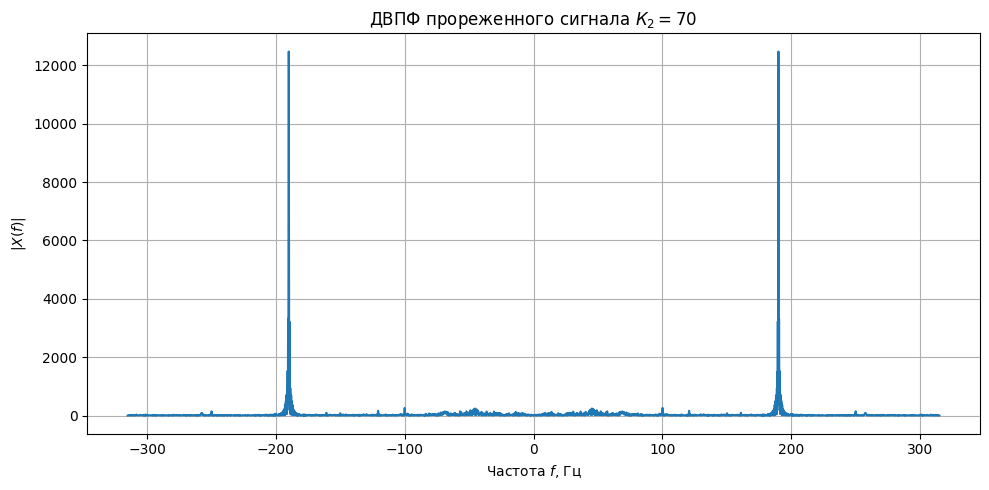

In [23]:
fs, x=scipy.io.wavfile.read('./dataset_lab1/tuning-fork.wav')
#for mono channel 
#x=x[:,1] 

plt.figure(figsize=[10, 5], dpi=100)

DFTF_plot=DTFT_abs(x/fs, fs)
plt.plot(DFTF_plot[0], DFTF_plot[1])
plt.grid()
plt.title("ДВПФ исходного сигнала")
plt.xlabel("Частота $f$, Гц")
plt.ylabel("$|X(f)|$")
plt.tight_layout() 

# downsampling
plt.figure(figsize=[10, 5], dpi=100)
K1=10
y=x[::K1]
DFTF_plot=DTFT_abs(y/(fs/K1), fs/K1)
plt.plot(DFTF_plot[0], DFTF_plot[1])
plt.grid()
plt.title("ДВПФ прореженного сигнала $К_1=$%i" %K1)
plt.xlabel("Частота $f$, Гц")
plt.ylabel("$|X(f)|$")
plt.tight_layout() 

# downsampling
plt.figure(figsize=[10, 5], dpi=100)
K2=70
y=x[::K2]
    
DFTF_plot=DTFT_abs(y/(fs/K2), fs/K2)
plt.plot(DFTF_plot[0], DFTF_plot[1])
plt.grid()
plt.title("ДВПФ прореженного сигнала $К_2=$%i" %K2)
plt.xlabel("Частота $f$, Гц")
plt.ylabel("$|X(f)|$")
plt.tight_layout() 

- Прореживание на $K$ равносильно уменьшению частоты дискретизации в $K$ раз. 
- Для основной частоты в $440$ Гц по теореме Котельникова требуется частота дискретизации $880$ Гц, чтобы исходный аналоговый сигнал можно было точно восставновить рядом Котельникова (а из спектра ДВПФ можно было "вырезать" спектр исходного сигнала). 
- При прореживании на $K_1$ = 10 частота дискретизации падает: $f_{s1}$ = 4410 Гц
- При прореживании на $K_2$ = 70 частота дискретизации падает: $f_{s2}$ = 630 Гц
- Таким образом, при $f_{s1}$ не будет эффекта наложения (или он будет очень слабым, так как спектр камертона в оснвном лежит около частоты $440$ Гц), однако при при $f_{s2}$ эффект наложения точно будет.
- Видим, что в первом случае частоты пиков спектра ДВПФ совпадают с исходной частотой $440$ Гц, а во втором - нет.
- Спектр аналогового сигнала повторяется с периодом $f_s$, значит, во втором случае с периодом $630$ Гц, то есть видимая частота пика - это $630 - 440 = 190 $ Гц, спектр "отражается" от границ полосы Найквиста $[-315, 315]$ Гц. 

> После сдачи трёх заданий дают задачи на выбор из методички, если хочешь отл. 10, то что-то придумывает препод.
Никита Алексеевич и Александр Антипов.
На отл 10: почему обычно частота дискретизации обычно 44100 Hz \
Ответ: полоса Найквиста 22050 - макс. слышимая человеком частота.

>Дальше можно показать допуск и сразу сделанную лабу (или только только допуск, но при этом весь, по одному вопросу на человека, если всей группой делать)\
Лаба: ДВПФ